### Nombre: Ximena Paniagua Sánchez

# Tarea 2

In [3]:
import camb
from camb import model
import numpy as np
import matplotlib.pyplot as plt

## P4

Numerically  solve the perturbation equations for a matter component with $w = \delta p = \sigma = 0$ where $w$ is the equation of state parameter, $\delta p$ the pressure perturbation and $\sigma$ the anisotropic stress. Assume a $\Lambda CDM$ model with $\Omega_{r,0} = 10^{-4}$ and $\Omega_{m,0} = 0.3$. Plot your results for $10^{-4} \geq a\geq 1$ and four different scales: $k = H_0$, $k = 5H_0$, $k = 20H_0$ and $k = 200H_0$. Consider $H_0 = 67$ Km/(sMpc). 

The perturbation equations are:

$$
k^2 \phi + 3H(H \psi + \dot{\phi}) = -4 \pi G a^2 \delta \rho
$$

$$
H\psi + \dot{\phi} = 4\pi Ga^2(1 + w)\rho \theta
$$

$$
\phi = \psi
$$

$$
    \dot{\delta} = - (1 + w)(\theta - 3\dot{\phi}) - H\left( \frac{\delta p}{\rho} - w\delta \right)
$$

$$
    \dot{\theta} = -H(1 - 3w)\theta - \frac{\dot{w}}{1 + w}\theta + \frac{1}{1+w}\frac{k^2 \delta p}{\rho} + k^2 \psi
$$

Then, considering $w = \delta p = \sigma = 0$:

$$
k^2 \phi + 3H(H \psi + \dot{\phi}) = -4 \pi G a^2 \delta \rho
$$

$$
k^2 (H\psi + \dot{\phi}) = 4\pi Ga^2\rho \theta
$$

$$
\phi = \psi
$$

$$
    \dot{\delta} = - (\theta - 3\dot{\phi})
$$

$$
    \dot{\theta} = -H \theta + k^2 \psi
$$

Then, we can reduce it to a system of $4$ equations: 

1. $k^2 \phi + 3H(H\phi + \dot{\phi}) = -4 \pi G a^2 \delta \rho$

2. $\dot{\phi} = \frac{4 \pi a^2 G \rho \theta}{k^2} - H \phi$

3. $\dot{\delta} = - \theta + 3 \left( \frac{4 \pi a^2 G \rho \theta}{k^2} - H\psi \right)$

4. $\dot{\theta} = - H \theta + k^2 \phi$

But we can reduce it to $3$ because $\delta \rho$ can be compute with the other results. So, the system that we need to compute is:

1. $\dot{\phi} = \frac{4 \pi a^2 G \rho \theta}{k^2} - H \phi$

2. $\dot{\delta} = - \theta + 3 \left( \frac{4 \pi a^2 G \rho \theta}{k^2} - H\psi \right)$

3. $\dot{\theta} = - H \theta + k^2 \phi$

Also, we have the following data: 

1. $\Omega_{r,0} = 10^{-4}$

2. $\Omega_{m,0} = 0.3$

3. $10^{-4} \leq a \leq 1$

4. $H_0 = 67$ km/(sMpc)

In [4]:
# Defining constants

Omega_r0 = 10**(-4)

Omega_m0 = 0.3

H_0 = 67 # km / (sMpc)

G = 2.27 * 10 ** (-78) # Mpc^3 kg^{−1} s^{−2}

rho_c = (3 * (H_0 **2)) / (8 * np.pi * G)

rho = (Omega_r0 + Omega_m0) * rho_c

In [5]:
def H(a): 
    H_2 = H_0**2 * (Omega_r0 * (a**-4) + Omega_m0 * (a ** -3))
    return np.sqrt(H_2)

In [6]:
from scipy.integrate import solve_ivp

k = H_0 

def equations(a, y, k):
    phi, delta, theta = y
    
    H_val = H(a)
    
    dphi = (4 * np.pi * G * rho * theta * a**2) / (k**2) - H_val * phi
    ddelta = -theta + 3 * ((4 * np.pi * G * rho * theta * a**2) / (k**2) - H_val * phi)
    dtheta = -H_val * theta + k**2 * phi
    
    return [dphi, ddelta, dtheta]

a_values = np.linspace(1e-4, 1, 100) 
initial_conditions = [10**7 / (k**2), 10**7, 0] 
solution = solve_ivp(equations, [a_values[0], a_values[-1]], initial_conditions, args=(k,), t_eval=a_values)

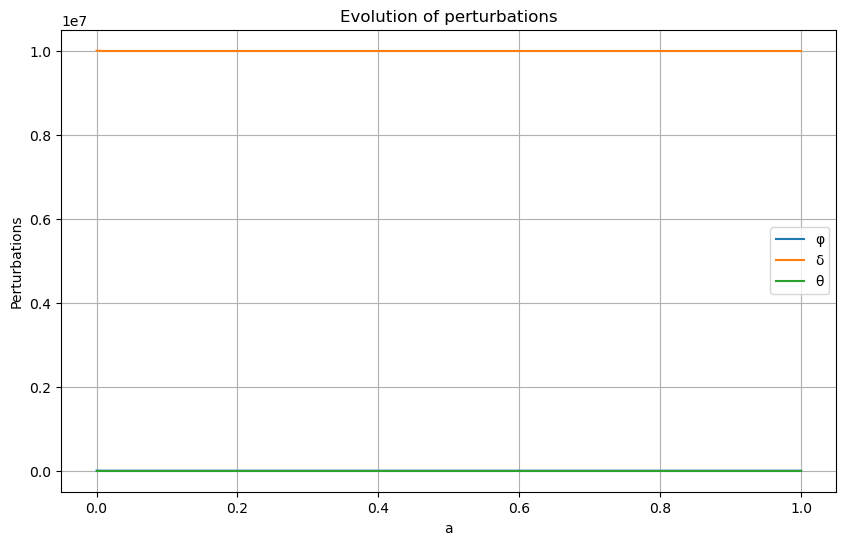

In [8]:
plt.figure(figsize=(10, 6))
plt.plot(solution.t, solution.y[0], label='φ')
plt.plot(solution.t, solution.y[1], label='δ')
plt.plot(solution.t, solution.y[2], label='θ')
plt.xlabel('a')
plt.ylabel('Perturbations')
plt.title('Evolution of perturbations')
plt.legend()
plt.grid()
plt.show()

## P5

Using CAMB compute the matter power spectrum at different redshift. Then, manually set the density of massive neutrinos to zero. Comment the differences and justify the results. 

In [101]:
Omega_c0 = 0.2685628338348412

Omega_nu0 = 0.00143717

Omega_b0 = 0.05

Omega_m0 = 0.32 # Omega_c0 + Omega_nu0 + Omega_b0

Omega_DE0 = 0.68 #Omega_lambda = (1-Omega_m0)

w0= -1

wa = 0

Omega_K0 = 0

h = 0.67

c = 299792

sigma8 = 0.816

ns = 0.96

gamma = 6/11

Aia = 1.72

Cia = 0.0134

In [102]:
pars = camb.CAMBparams() 

pars.set_cosmology(H0=100*h, ombh2=Omega_b0*h**2, omch2=(Omega_m0 - Omega_b0)*h**2)

pars.set_dark_energy(w=w0, wa=wa)

pars.InitPower.set_params(ns=ns) 

redshifts = [10000, 100, 10]

In [103]:
pars.NonLinear = model.NonLinear_none
pars.set_matter_power(redshifts=redshifts, kmax=1)
results = camb.get_results(pars)
kh, z, PK = results.get_matter_power_spectrum(minkh=1e-4)

In [104]:
pars.NonLinear = model.NonLinear_pk
pars.set_matter_power(redshifts=redshifts, kmax=1)
results = camb.get_results(pars)
kh_nl, z_nl, PK_nl = results.get_matter_power_spectrum(minkh=1e-4)

In [105]:
#fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5), sharey=True)

#for iz, redshift in enumerate(redshifts):
 #   ax.loglog(kh, PK[iz, :], color='r')
 #   ax.loglog(kh_nl, PK_nl[iz, :], color='b')

#plt.legend()

### Without massive neutrinos

Massive neutrinos suprime the matter power spectrum to a small one

In [106]:
pars = camb.CAMBparams() 

pars.set_cosmology(H0=100*h, ombh2=Omega_b0*h**2, omch2=(Omega_m0 - Omega_b0)*h**2, mnu = 0)

pars.set_dark_energy(w=w0, wa=wa)

pars.InitPower.set_params(ns=ns) 

class: <InitialPowerLaw>
 tensor_parameterization = tensor_param_rpivot
 ns = 0.96
 nrun = 0.0
 nrunrun = 0.0
 nt = -0.0
 ntrun = -0.0
 r = 0.0
 pivot_scalar = 0.05
 pivot_tensor = 0.05
 As = 2e-09
 At = 1.0
 

In [107]:
pars.NonLinear = model.NonLinear_none
pars.set_matter_power(redshifts=redshifts, kmax=1)
results = camb.get_results(pars)
kh, z, PK_nu = results.get_matter_power_spectrum(minkh=1e-4)

In [108]:
pars.NonLinear = model.NonLinear_pk
pars.set_matter_power(redshifts=redshifts, kmax=1)
results = camb.get_results(pars)
kh_nl, z_nl, PK_nl_nu = results.get_matter_power_spectrum(minkh=1e-4)

In [109]:
#fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5), sharey=True)

#for iz, redshift in enumerate(redshifts):
 #   ax.loglog(kh, PK_nu[iz, :], color='r')
  #  ax.loglog(kh_nl, PK_nl_nu[iz, :], color='b')

**Comparing**

*Linear:*

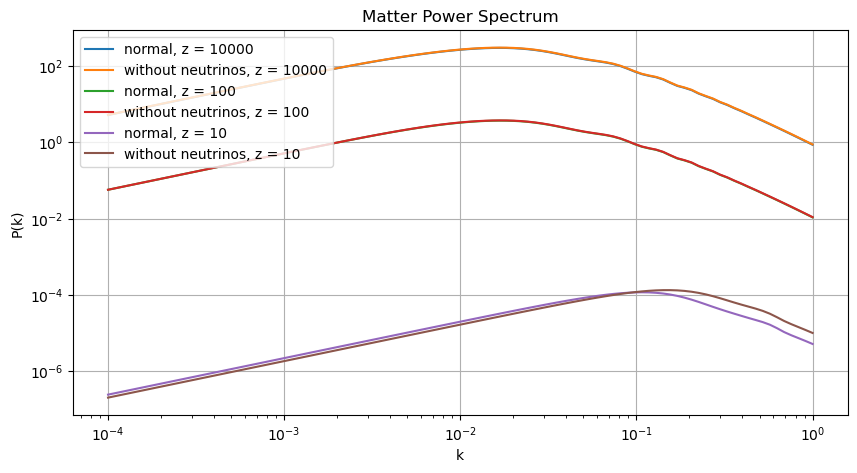

In [110]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5), sharey=True)

for iz, redshift in enumerate(redshifts):
    ax.loglog(kh, PK[iz, :], label = 'normal, z = ' + str(redshift))
    ax.loglog(kh_nl, PK_nu[iz, :], label = 'without neutrinos, z = ' + str(redshift))
ax.legend(loc='upper left')

plt.xlabel('k')
plt.ylabel('P(k)')
plt.title('Matter Power Spectrum')
plt.grid()
plt.show()

*Non-linear:*



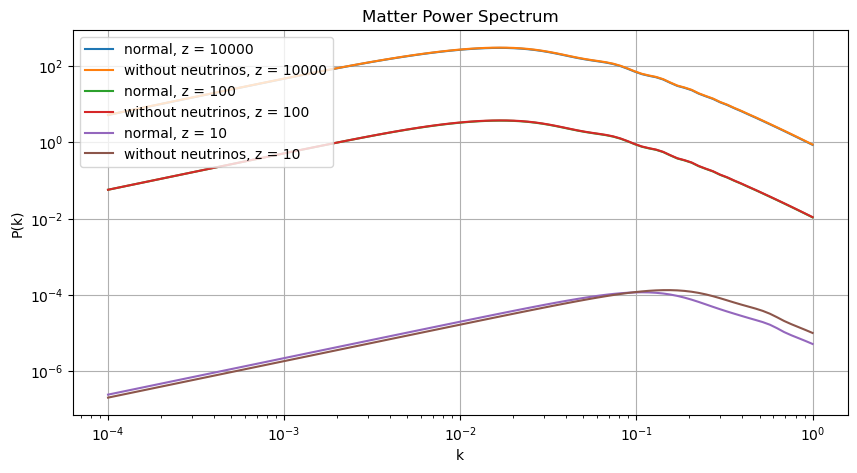

In [111]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5), sharey=True)

for iz, redshift in enumerate(redshifts):
    ax.loglog(kh, PK_nl[iz, :], label = 'normal, z = ' + str(redshift))
    ax.loglog(kh_nl, PK_nl_nu[iz, :], label = 'without neutrinos, z = ' + str(redshift))
ax.legend(loc='upper left')

plt.xlabel('k')
plt.ylabel('P(k)')
plt.title('Matter Power Spectrum')
plt.grid()
plt.show()

*Analysis*

We can see that for both the linear and non-linear matter power spectra, the differences become significant at lower $ z $. In both cases, the curves are similar until around $ k \approx 10^{-1} $, where a notable separation occurs. The 'normal' $ P_k $ (which includes massive neutrinos) decays faster than the $ P_k $ without neutrinos at larger scales (small $ k $). This behavior arises because the kinetic energy of neutrinos acts to ``smooth'' the gravitational forces that facilitate structure formation in the universe.

As matter begins to dominate (around $ k \approx 10^{-1} $), the presence of neutrinos effectively slows down the growth of structures, resulting in smaller differences in matter density throughout the universe. In contrast, when neutrinos are absent, large-scale structures experience faster growth, leading to greater differences in matter density. Consequently, the $ P_k $ without neutrinos decays more slowly.

On the other hand, at later times, neutrinos have reduced their velocity and temperature. As a result, they can once again contribute to the formation of large-scale structures. This is why we observe the domination of the purple curve at larger scales, as is the case today.


## P6 

Using CAMB compute the TT angular power spectrum. Then, explore different cosmological parameters and explain the differences in the results. Give a least one compelling example and its justification. 

Here we are going to analyze the behavior of the angular power spectrum with respect to two values ​​of baryon density.

In [112]:
pars_1 = camb.CAMBparams() 

pars_1.set_cosmology(H0=100*h, ombh2=Omega_b0*h**2, omch2=(Omega_m0 - Omega_b0)*h**2)

pars_1.set_dark_energy(w=w0, wa=wa)

pars_1.InitPower.set_params(ns=ns) 

class: <InitialPowerLaw>
 tensor_parameterization = tensor_param_rpivot
 ns = 0.96
 nrun = 0.0
 nrunrun = 0.0
 nt = -0.0
 ntrun = -0.0
 r = 0.0
 pivot_scalar = 0.05
 pivot_tensor = 0.05
 As = 2e-09
 At = 1.0
 

In [113]:
pars_2 = camb.CAMBparams() 

pars_2.set_cosmology(H0=100*h, ombh2=0.03, omch2=(Omega_m0 - Omega_b0)*h**2)

pars_2.set_dark_energy(w=w0, wa=wa)

pars_2.InitPower.set_params(ns=ns) 

class: <InitialPowerLaw>
 tensor_parameterization = tensor_param_rpivot
 ns = 0.96
 nrun = 0.0
 nrunrun = 0.0
 nt = -0.0
 ntrun = -0.0
 r = 0.0
 pivot_scalar = 0.05
 pivot_tensor = 0.05
 As = 2e-09
 At = 1.0
 

In [114]:
powers_1 = results.get_cmb_power_spectra(pars_1, CMB_unit='muK')
for name in powers_1: print(name)

powers_2 = results.get_cmb_power_spectra(pars_2, CMB_unit='muK')
for name in powers_1: print(name)

total
unlensed_scalar
unlensed_total
lensed_scalar
tensor
lens_potential
total
unlensed_scalar
unlensed_total
lensed_scalar
tensor
lens_potential


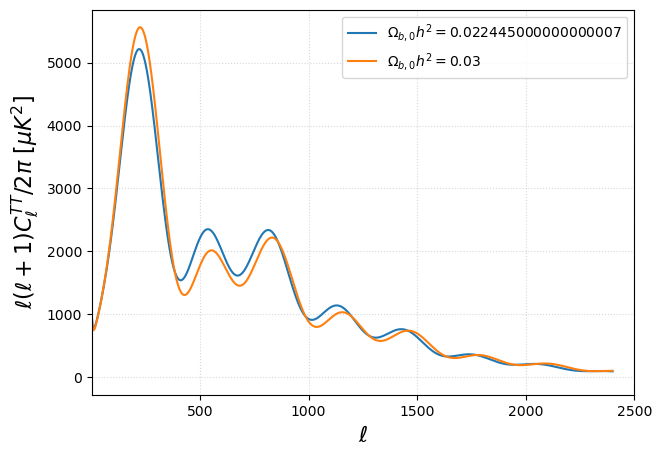

In [115]:
unlensedCL_1=powers_1['unlensed_scalar']

unlensedCL_2=powers_2['unlensed_scalar']

ells_1 = np.arange(unlensedCL_1[:, 0].shape[0])
ells_2 = np.arange(unlensedCL_2[:, 0].shape[0])

plt.figure(figsize=(7, 5))
plt.plot(ells_1, unlensedCL_1[:, 0], label = '$\Omega_{b,0}h^2= $' + str(Omega_b0*h**2))  # 0: TT, 1: EE, 2: BB, 3: TE
plt.plot(ells_2, unlensedCL_2[:, 0], label = '$\Omega_{b,0}h^2= $' + str(0.03)) 
plt.xlabel(r'$\ell$', fontsize=16)
plt.ylabel(r'$\ell(\ell+1)C_{\ell}^{TT} / 2\pi$ [$\mu K^2$]', fontsize=16)

plt.legend()

plt.xlim(2, 2500)
plt.grid(alpha=0.5, ls=':')
plt.show()

The angular power spectrum is a representation of how temperature fluctuations in the cosmic microwave background (CMB) or other fields (like galaxy distributions) are distributed across different angular scales on the sky. It quantifies the intensity of fluctuations as a function of multipole moments $l$, which correspond to different angular scales. Higher values of $l$ correspond to smaller angular scales, allowing us to analyze the structure and features of the universe's early conditions, such as acoustic peaks in the CMB. Essentially, it helps us understand the patterns and anisotropies in the observed sky.


The $\Omega_{b, 0}h^2$ describes the density of barions today. 

When the baryon density increases, the sound horizon decreases because sound waves can propagate over shorter distances before the plasma becomes decoupled. This reduction in the sound horizon causes the positions of the acoustic peaks in the angular power spectrum to shift to the right (higher multipoles $l$). Essentially, higher baryon density means that structures are more compact at decoupling, leading to the observed shift in peaks.

The height of the peaks is also affected by baryon density. With a higher baryon density, the baryonic contribution to the gravitational potential wells becomes more pronounced. The first peak (the largest) represents the fundamental mode of oscillation, where pressure waves in the baryonic fluid have built up sufficient amplitude. A larger baryon density results in a stronger gravitational pull, leading to a higher amplitude for the first peak. However, subsequent peaks (higher-order modes) become progressively smaller because they represent more complex oscillations where the energy has been redistributed among multiple modes. Thus, while the first peak becomes more pronounced, the subsequent peaks decrease in height.

In summary, understanding the impact of baryon density on the angular power spectrum not only provides insights into the conditions of the early universe but also helps cosmologists trace the evolution of structure formation throughout cosmic history.